<a href="https://colab.research.google.com/github/maimonahST/Signal_It/blob/main/Final%20Version/All_Featuers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ML Models**

## Load Data

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import scipy.io
import torch.nn as nn
import torch
import numpy as np
from sklearn.model_selection import GroupKFold,LeaveOneGroupOut
from sklearn.preprocessing import StandardScaler
from sklearn.base import TransformerMixin,BaseEstimator
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from glob import glob
import scipy.io
import torch.nn as nn
import torch
import numpy as np

data_array = np.load('/content/drive/MyDrive/GP-Data/data_array.npy')
label_array = np.load('/content/drive/MyDrive/GP-Data/label_array.npy')
group_array = np.load('/content/drive/MyDrive/GP-Data/group_array.npy')

print(data_array.shape,label_array.shape,group_array.shape)

(7150, 1250, 33) (7150,) (7150,)


In [ ]:
gkf=GroupKFold()
class StandardScaler3D(BaseEstimator,TransformerMixin):
    #batch, sequence, channels
    def __init__(self):
        self.scaler = StandardScaler()

    def fit(self,X,y=None):
        self.scaler.fit(X.reshape(-1, X.shape[2]))
        return self

    def transform(self,X):
        return self.scaler.transform(X.reshape( -1,X.shape[2])).reshape(X.shape)


def three_splits(data_array , label_array, group_array):

  # Split data_array into train and validate
  train_groups = []
  for train_index, test_index in gkf.split(data_array, label_array, groups=group_array):
      train_features, train_label = data_array[train_index],label_array[train_index]
      X_test, y_test =data_array[test_index],label_array[test_index]
      train_groups = group_array[train_index]

      scaler=StandardScaler3D()
      train_features=scaler.fit_transform(train_features)
      X_test=scaler.transform(X_test)

      print(f"group={np.unique(group_array[train_index])}")
      print(f"group={np.unique(group_array[test_index])}")
      break

  # Split train_features into train and val
  for train_index, val_index in gkf.split(train_features, train_label, groups= train_groups):
      X_train, y_train =train_features[train_index],train_label[train_index]
      X_val, y_val =train_features[val_index],train_label[val_index]

      print(f"group={np.unique(group_array[train_index])}")
      print(f"group={np.unique(group_array[val_index])}")

      break

  return X_train, X_val, X_test, y_train, y_val, y_test




def two_splits(data_array , label_array, group_array):

  # Split data_array into train and validate
  train_groups = []
  for train_index, test_index in gkf.split(data_array, label_array, groups=group_array):
      X_train, y_train = data_array[train_index],label_array[train_index]
      X_test, y_test =data_array[test_index],label_array[test_index]
      train_groups = group_array[train_index]

      scaler=StandardScaler3D()
      X_train=scaler.fit_transform(X_train)
      X_test=scaler.transform(X_test)

      print(f"group={np.unique(group_array[train_index])}")
      print(f"group={np.unique(group_array[test_index])}")
      break

  return X_train, X_test, y_train, y_test


# X_train, X_val, X_test, y_train, y_val, y_test = three_splits(data_array , label_array, group_array)

X_train, X_test, y_train, y_test = two_splits(data_array , label_array, group_array)

# convert the problem from multiclass classification to binary classification
# make haemorrhage and schaemia classes as one

y_train[y_train==0] = 1
y_train[y_train==2] = 0

# y_val[y_val==0] = 1
# y_val[y_val==2] = 0

y_test[y_test==0] = 1
y_test[y_test==2] = 0

group=[ 0  1  2  3  4  5  6  7  8 10 11 12 13 15 16 18 19 20 22 23 25 27 28 29
 30 31 34 36 37 38 39 40 41 42 43 44 45 46 47]
group=[ 9 14 17 21 24 26 32 33 35]


In [ ]:
# Flatten the data array for ML models
X_train = X_train.reshape(X_train.shape[0], -1)
# X_val = X_val.reshape(X_val.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)
y_train = y_train.reshape(y_train.shape[0], -1)
# y_val = y_val.reshape(y_val.shape[0], -1)
y_test = y_test.reshape(y_test.shape[0], -1)

## Gaussian NB

In [ ]:
from sklearn.naive_bayes import GaussianNB

# Create Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# No hyperparameters to tune for Gaussian Naive Bayes, but you can include them if using other types

# Fit the model to the data
nb_classifier.fit(X_train, y_train)

# Predictions on the test set using the Naive Bayes model
nb_test_predictions = nb_classifier.predict(X_test)

# Calculate evaluation metrics for Naive Bayes
nb_accuracy = accuracy_score(y_test, nb_test_predictions)
nb_precision = precision_score(y_test, nb_test_predictions, average='weighted')
nb_recall = recall_score(y_test, nb_test_predictions, average='weighted')
nb_f1 = f1_score(y_test, nb_test_predictions, average='weighted')

# Print metrics for Naive Bayes
print("Accuracy:", nb_accuracy)
print("Precision:", nb_precision)
print("Recall:", nb_recall)
print("F1-score:", nb_f1)

Accuracy: 0.4953000723065799
Precision: 0.5687892174784692
Recall: 0.4953000723065799
F1-score: 0.5131117501674459


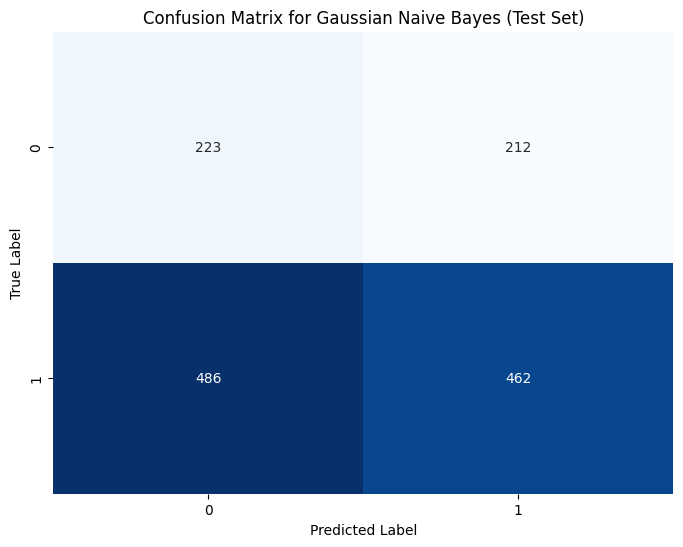

In [ ]:
# Compute the confusion matrix for the test set
cm_test = confusion_matrix(y_test, nb_test_predictions)

# Plot the confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Gaussian Naive Bayes (Test Set)")
plt.show()

In [ ]:
import joblib

# Specify the full path including the filename and .joblib extension
model_path = '/content/drive/MyDrive/GP-Trail/GNBWithHayperParameter.joblib'

# Save your model
joblib.dump(nb_classifier, model_path)

['/content/drive/MyDrive/GP-Trail/GNBWithHayperParameter.joblib']

## Bernoulli NB

In [ ]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Create Bernoulli Naive Bayes classifier
bnb_classifier = BernoulliNB()

# Define the parameter grid for grid search
param_grid_bnb = {
    'alpha': [0.1, 0.5, 1.0],
    'binarize': [0.0, 0.5, 1.0],
    'fit_prior': [True, False]
}

# Create GridSearchCV
grid_search_bnb = GridSearchCV(estimator=bnb_classifier, param_grid=param_grid_bnb,
                                cv=3, scoring='accuracy', n_jobs=-1)

# Fit the grid search to the data
grid_search_bnb.fit(X_train, y_train)

# Get the best parameters and best estimator for Bernoulli Naive Bayes
best_params_bnb = grid_search_bnb.best_params_
best_bnb_classifier = grid_search_bnb.best_estimator_

# Print the best parameters for Bernoulli Naive Bayes
print("Best Hyperparameters for Bernoulli Naive Bayes:", best_params_bnb)

Best Hyperparameters for Bernoulli Naive Bayes: {'alpha': 0.1, 'binarize': 0.0, 'fit_prior': True}


In [ ]:
# Predictions on the test set using the best Bernoulli Naive Bayes model
best_bnb_test_predictions = best_bnb_classifier.predict(X_test)

# Calculate evaluation metrics for Bernoulli Naive Bayes
bnb_accuracy = accuracy_score(y_test, best_bnb_test_predictions)
bnb_precision = precision_score(y_test, best_bnb_test_predictions, average='weighted')
bnb_recall = recall_score(y_test, best_bnb_test_predictions, average='weighted')
bnb_f1 = f1_score(y_test, best_bnb_test_predictions, average='weighted')

# Print metrics for Bernoulli Naive Bayes
print("Accuracy:", bnb_accuracy)
print("Precision:", bnb_precision)
print("Recall:", bnb_recall)
print("F1-score:", bnb_f1)

Accuracy: 0.6926970354302241
Precision: 0.7617992630108333
Recall: 0.6926970354302241
F1-score: 0.5753222816395057


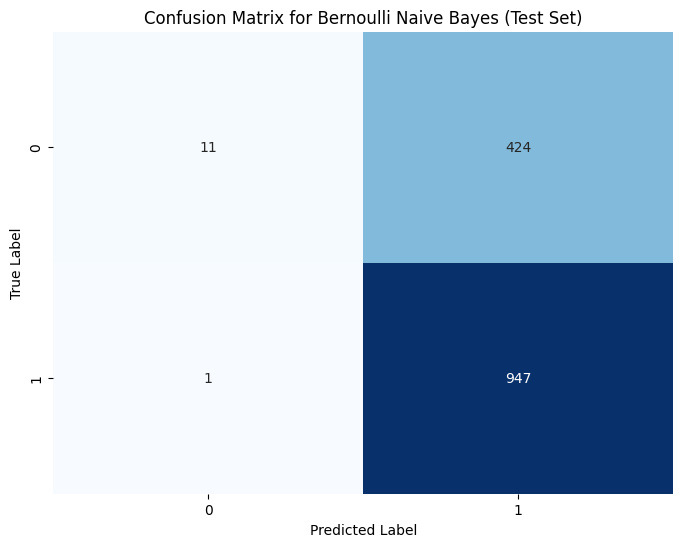

In [ ]:
# Compute the confusion matrix for the test set
cm_test = confusion_matrix(y_test, best_bnb_test_predictions)

# Plot the confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Bernoulli Naive Bayes (Test Set)")
plt.show()

In [ ]:
import joblib

# Specify the full path including the filename and .joblib extension
model_path = '/content/drive/MyDrive/GP-Trail/BNBWithHayperParameter.joblib'

# Save your model
joblib.dump(best_bnb_classifier, model_path)

['/content/drive/MyDrive/GP-Trail/BNBWithHayperParameter.joblib']

## LightGBM

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define hyperparameters for LightGBM
lightgbm_params = {
    'learning_rate': 0.01,
    'n_estimators': 200,
    'max_depth': -1,
    'subsample': 0.8,
    'colsample_bytree': 0.8
}

# Create LGBMClassifier with specified hyperparameters
lightgbm_classifier = LGBMClassifier(**lightgbm_params, random_state=42)

# Fit the model to the training data
lightgbm_classifier.fit(X_train, y_train)

# Predictions on the test set using the trained LightGBM model
lightgbm_test_predictions = lightgbm_classifier.predict(X_test)

# Calculate evaluation metrics for LightGBM
lightgbm_accuracy = accuracy_score(y_test, lightgbm_test_predictions)
lightgbm_precision = precision_score(y_test, lightgbm_test_predictions, average='weighted')
lightgbm_recall = recall_score(y_test, lightgbm_test_predictions, average='weighted')
lightgbm_f1 = f1_score(y_test, lightgbm_test_predictions, average='weighted')

# Print metrics for LightGBM
print("Accuracy:", lightgbm_accuracy)
print("Precision:", lightgbm_precision)
print("Recall:", lightgbm_recall)
print("F1-score:", lightgbm_f1)

[LightGBM] [Info] Number of positive: 3406, number of negative: 2361
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 3.894440 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10272887
[LightGBM] [Info] Number of data points in the train set: 5767, number of used features: 41250
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.590602 -> initscore=0.366453
[LightGBM] [Info] Start training from score 0.366453
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Accuracy: 0.6717281272595806
Precision: 0.7104022316657997
Recall: 0.6717281272595806
F1-score: 0.6821591529092444


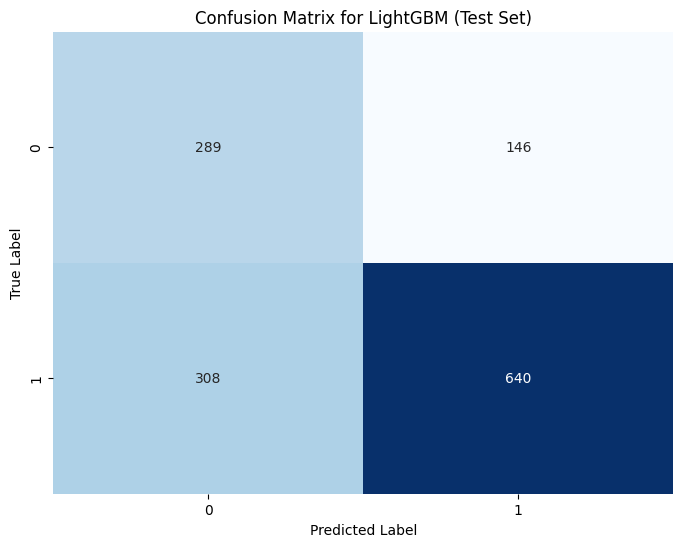

In [ ]:
# Compute the confusion matrix for the test set
cm_test = confusion_matrix(y_test, lightgbm_test_predictions)

# Plot the confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for LightGBM (Test Set)")
plt.show()

In [ ]:
import joblib

# Specify the full path including the filename and .joblib extension
model_path = '/content/drive/MyDrive/GP-Trail/LGBMWithHayperParameter.joblib'

# Save your model
joblib.dump(lightgbm_classifier, model_path)

['/content/drive/MyDrive/GP-Trail/LGBMWithHayperParameter.joblib']

## Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define hyperparameters for AdaBoost
adaboost_params = {
    'n_estimators': 100,  # Number of weak learners
    'learning_rate': 0.5  # Weighting of weak learners
}

# Create AdaBoostClassifier with specified hyperparameters
adaboost_classifier = AdaBoostClassifier(**adaboost_params, random_state=42)

# Fit the model to the training data
adaboost_classifier.fit(X_train, y_train)

# Predictions on the test set using the trained AdaBoost model
adaboost_test_predictions = adaboost_classifier.predict(X_test)

# Calculate evaluation metrics for AdaBoost
adaboost_accuracy = accuracy_score(y_test, adaboost_test_predictions)
adaboost_precision = precision_score(y_test, adaboost_test_predictions, average='weighted')
adaboost_recall = recall_score(y_test, adaboost_test_predictions, average='weighted')
adaboost_f1 = f1_score(y_test, adaboost_test_predictions, average='weighted')

# Print metrics for AdaBoost
print("Accuracy:", adaboost_accuracy)
print("Precision:", adaboost_precision)
print("Recall:", adaboost_recall)
print("F1-score:", adaboost_f1)

Accuracy: 0.47360809833694867
Precision: 0.42431737211039655
Recall: 0.47360809833694867
F1-score: 0.4471631718486382


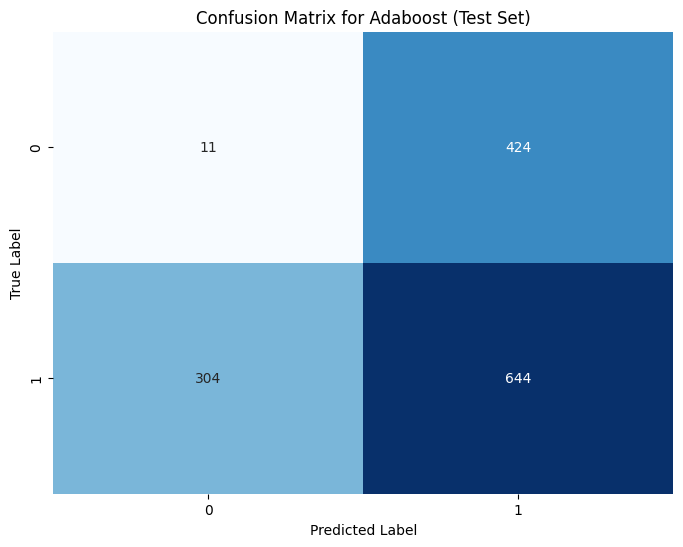

In [ ]:
# Compute the confusion matrix for the test set
cm_test = confusion_matrix(y_test, adaboost_test_predictions)

# Plot the confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Adaboost (Test Set)")
plt.show()

## XGBoost

Accuracy: 0.7845263919016631
Recall: 0.7845263919016631
Precision: 0.7862095014404701
F1-score: 0.7853059770776329
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.65      0.67      0.66       435
           1       0.85      0.84      0.84       948

    accuracy                           0.78      1383
   macro avg       0.75      0.75      0.75      1383
weighted avg       0.79      0.78      0.79      1383



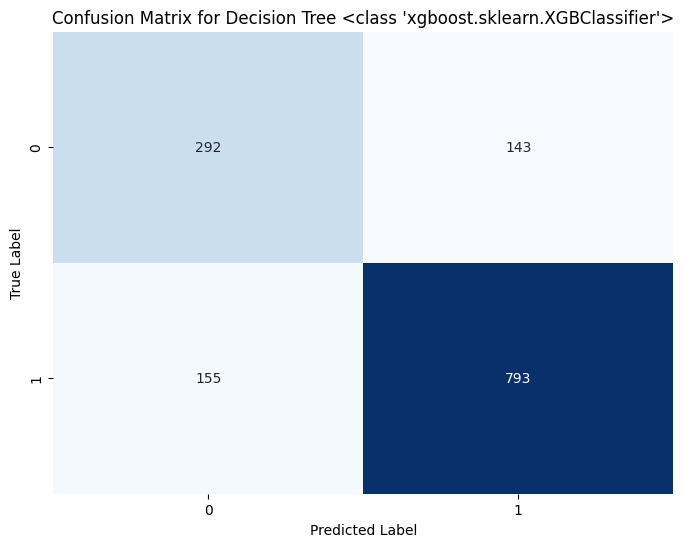

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Train a Decision Tree Classifier
xgb_classifier = XGBClassifier(
    max_depth=9,
    n_estimators=200,
    learning_rate=0.01
)
xgboost=fit_and_evaluate(X_train, y_train,X_test , y_test,xgb_classifier)


In [ ]:
import joblib

# Specify the full path including the filename and .joblib extension
model_path = '/content/drive/MyDrive/GP-Trail/XGBoostWithHayperParameter_T6.joblib'

# Save your model
joblib.dump(xgboost, model_path)

['/content/drive/MyDrive/GP-Trail/XGBoostWithHayperParameter_T6.joblib']

## KNN

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Accuracy: 0.6109906001446131
Recall: 0.6109906001446131
Precision: 0.5957017497240352
F1-score: 0.6022247189256205
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.36      0.31      0.33       435
           1       0.70      0.75      0.73       948

    accuracy                           0.61      1383
   macro avg       0.53      0.53      0.53      1383
weighted avg       0.60      0.61      0.60      1383



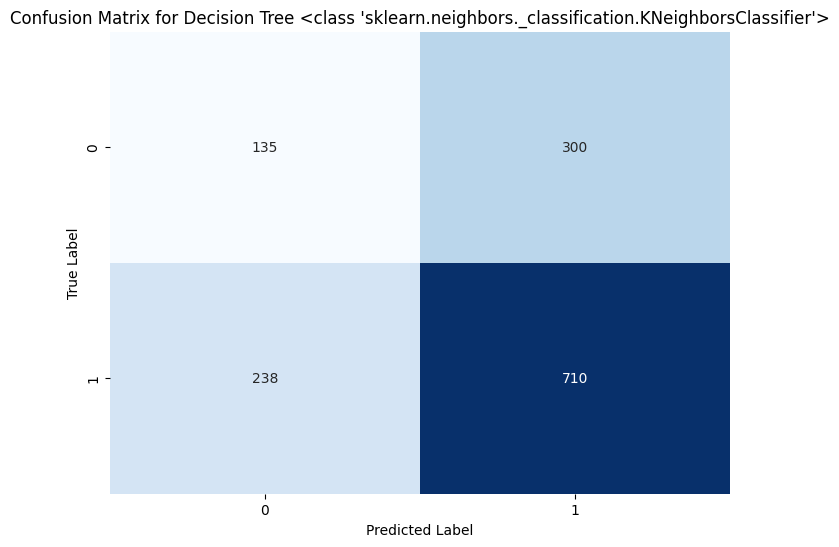

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model=fit_and_evaluate(X_train, y_train,X_test , y_test,KNeighborsClassifier(algorithm='auto', n_neighbors=15, weights='uniform'))


In [ ]:
import joblib

# Specify the full path including the filename and .joblib extension
model_path = '/content/drive/MyDrive/GP-Trail/knnWithHayperParameter.joblib'

# Save your model
joblib.dump(model, model_path)

['/content/drive/MyDrive/GP-Trail/knnWithHayperParameter.joblib']

## DT

Accuracy: 0.6789587852494577
Recall: 0.6789587852494577
Precision: 0.7102521333366694
F1-score: 0.6882555191430787
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.49      0.65      0.56       435
           1       0.81      0.69      0.75       948

    accuracy                           0.68      1383
   macro avg       0.65      0.67      0.65      1383
weighted avg       0.71      0.68      0.69      1383



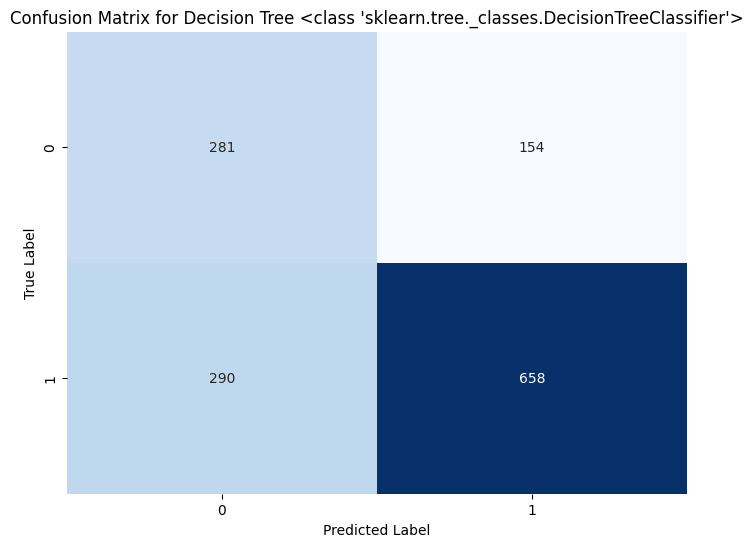

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
tree_params = {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 5}
# Train a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(**tree_params)
dt=fit_and_evaluate(X_train, y_train,X_test , y_test,dt_classifier)


In [ ]:
import joblib

# Specify the full path including the filename and .joblib extension
model_path = '/content/drive/MyDrive/GP-Trail/DTWithHayperParameter.joblib'

# Save your model
joblib.dump(dt, model_path)

['/content/drive/MyDrive/GP-Trail/DTWithHayperParameter.joblib']

## RF

<ipython-input-6-f4c83a58cea2>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Accuracy: 0.8669558929862617
Recall: 0.8669558929862617
Precision: 0.8780885172246653
F1-score: 0.8576453434670921
Classification Report (Test):
               precision    recall  f1-score   support

           0       0.95      0.61      0.74       435
           1       0.85      0.98      0.91       948

    accuracy                           0.87      1383
   macro avg       0.90      0.80      0.83      1383
weighted avg       0.88      0.87      0.86      1383



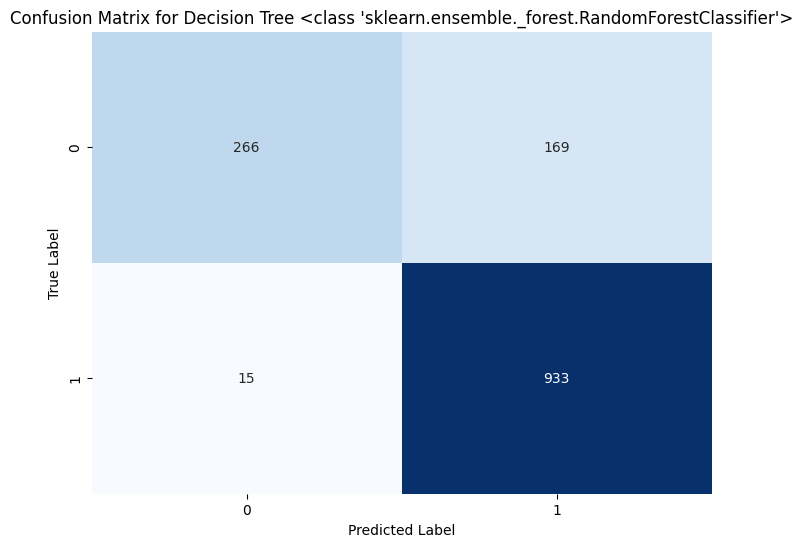

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score


model=fit_and_evaluate(X_train, y_train,X_test , y_test,RandomForestClassifier(n_estimators=25, max_features="sqrt", max_depth=9, max_leaf_nodes = 6))


In [ ]:
import joblib

# Specify the full path including the filename and .joblib extension
model_path = '/content/drive/MyDrive/result/rfWithHayperParameter.joblib'

# Save your model
joblib.dump(model, model_path)

['/content/drive/MyDrive/result/rfWithHayperParameter.joblib']

# **DL Models**

## **Load Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from glob import glob
import scipy.io
import torch.nn as nn
import torch
import numpy as np

data_array = np.load('/content/drive/MyDrive/GP-Data/data_array.npy')
label_array = np.load('/content/drive/MyDrive/GP-Data/label_array.npy')
group_array = np.load('/content/drive/MyDrive/GP-Data/group_array.npy')

print(data_array.shape,label_array.shape,group_array.shape)

(7150, 1250, 33) (7150,) (7150,)


In [ ]:
from sklearn.model_selection import GroupKFold
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler
import numpy as np

gkf=GroupKFold()
class StandardScaler3D(BaseEstimator,TransformerMixin):
    #batch, sequence, channels
    def __init__(self):
        self.scaler = StandardScaler()

    def fit(self,X,y=None):
        self.scaler.fit(X.reshape(-1, X.shape[2]))
        return self

    def transform(self,X):
        return self.scaler.transform(X.reshape( -1,X.shape[2])).reshape(X.shape)


def three_splits(data_array , label_array, group_array):

  # Split data_array into train and validate
  train_groups = []
  for train_index, test_index in gkf.split(data_array, label_array, groups=group_array):
      train_features, train_label = data_array[train_index],label_array[train_index]
      X_test, y_test =data_array[test_index],label_array[test_index]
      train_groups = group_array[train_index]

      scaler=StandardScaler3D()
      train_features=scaler.fit_transform(train_features)
      X_test=scaler.transform(X_test)

      print(f"group={np.unique(group_array[train_index])}")
      print(f"group={np.unique(group_array[test_index])}")
      break

  # Split train_features into train and val
  for train_index, val_index in gkf.split(train_features, train_label, groups= train_groups):
      X_train, y_train =train_features[train_index],train_label[train_index]
      X_val, y_val =train_features[val_index],train_label[val_index]

      print(f"group={np.unique(group_array[train_index])}")
      print(f"group={np.unique(group_array[val_index])}")

      break

  return X_train, X_val, X_test, y_train, y_val, y_test




def two_splits(data_array , label_array, group_array):

  # Split data_array into train and validate
  train_groups = []
  for train_index, test_index in gkf.split(data_array, label_array, groups=group_array):
      X_train, y_train = data_array[train_index],label_array[train_index]
      X_test, y_test =data_array[test_index],label_array[test_index]
      train_groups = group_array[train_index]

      scaler=StandardScaler3D()
      X_train=scaler.fit_transform(X_train)
      X_test=scaler.transform(X_test)

      print(f"group={np.unique(group_array[train_index])}")
      print(f"group={np.unique(group_array[test_index])}")
      break

  return X_train, X_test, y_train, y_test


X_train, X_val, X_test, y_train, y_val, y_test = three_splits(data_array , label_array, group_array)

#X_train, X_test, y_train, y_test = two_splits(data_array , label_array, group_array)

# convert the problem from multiclass classification to binary classification
# make haemorrhage and schaemia classes as one

y_train[y_train==0] = 1
y_train[y_train==2] = 0

y_val[y_val==0] = 1
y_val[y_val==2] = 0

y_test[y_test==0] = 1
y_test[y_test==2] = 0

group=[ 0  1  2  3  4  5  6  7  8 10 11 12 13 15 16 18 19 20 22 23 25 27 28 29
 30 31 34 36 37 38 39 40 41 42 43 44 45 46 47]
group=[ 9 14 17 21 24 26 32 33 35]
group=[ 0  2  3  5  6  7  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26
 27 28 29 30 31 32 33 34 35 36 37 38]
group=[ 1  4  8 15 16 22 23 27 28 35 36]


In [ ]:
# print the percentages of data split (3)

print("Train size:", len(X_train) / len(data_array) * 100, "%")
print("Validation size:", len(X_val) / len(data_array) * 100, "%")
print("Test size:", len(X_test) / len(data_array) * 100, "%")

Train size: 66.12587412587413 %
Validation size: 14.53146853146853 %
Test size: 19.342657342657343 %


In [ ]:
print((y_train == 0).sum())
print((y_test == 0).sum())
print((y_val == 0).sum())

print((y_train == 1).sum())
print((y_test == 1).sum())
print((y_val == 1).sum())

1922
435
439
2806
948
600


## CNN

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input,Dense,concatenate,Flatten,GRU,Conv1D, MaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras.callbacks import EarlyStopping

def block(input):
    conv1 = Conv1D(32, 2, strides=2, activation='relu', padding="same")(input)
    conv2 = Conv1D(32, 4, strides=2, activation='relu', padding="causal")(input)
    conv3 = Conv1D(32, 8, strides=2, activation='relu', padding="causal")(input)
    x = concatenate([conv1, conv2, conv3], axis=2)
    return x

# Define the input layer with a shape of (1250, 33)
input_layer = Input(shape=(1250, 33))

# Create the first block
block1 = block(input_layer)

# Create the second block using the 'block' function with the output of the first block as input
block2 = block(block1)

# Create the third block using the 'block' function with the output of the second block as input
block3 = block(block2)

cnn_out1 = Conv1D(32, 3, activation='relu', padding='same')(block3)
cnn_out2 = Conv1D(32, 3, activation='relu', padding='same')(cnn_out1)
cnn_out3 = MaxPooling1D(pool_size=2)(cnn_out2)
cnn_out4 = Flatten()(cnn_out3)

# Create a Dense layer with 1 unit and sigmoid activation for binary classification
predictions = Dense(1, activation='sigmoid')(cnn_out4)

# Define the model with 'input_layer' as the input and 'predictions' as the output
cnn = Model(inputs=input_layer, outputs=predictions)

# Specify the Adam optimizer with a learning rate of 0.0001
optimizer = Adam(learning_rate=0.0001)

# Compile the model with binary crossentropy loss and accuracy as the evaluation metric
cnn.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model using training features and labels
hist = cnn.fit(X_train, y_train, epochs=70, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/70
74/74 [==============================] - 5s 25ms/step - loss: 0.6766 - accuracy: 0.6127 - val_loss: 0.6910 - val_accuracy: 0.5650
Epoch 2/70
74/74 [==============================] - 1s 14ms/step - loss: 0.6494 - accuracy: 0.6286 - val_loss: 0.6951 - val_accuracy: 0.5765
Epoch 3/70
74/74 [==============================] - 1s 14ms/step - loss: 0.6239 - accuracy: 0.6426 - val_loss: 0.6968 - val_accuracy: 0.5813
Epoch 4/70
74/74 [==============================] - 1s 14ms/step - loss: 0.5871 - accuracy: 0.6775 - val_loss: 0.6666 - val_accuracy: 0.5967
Epoch 5/70
74/74 [==============================] - 1s 14ms/step - loss: 0.5076 - accuracy: 0.7599 - val_loss: 0.6124 - val_accuracy: 0.6708
Epoch 6/70
74/74 [==============================] - 1s 14ms/step - loss: 0.4220 - accuracy: 0.8185 - val_loss: 0.5576 - val_accuracy: 0.7045
Epoch 7/70
74/74 [==============================] - 1s 14ms/step - loss: 0.3341 - accuracy: 0.8761 - val_loss: 0.5286 - val_accuracy: 0.7421
Epoch 8/70
74

Average Confusion Matrix:
44/44 [==============================] - 0s 4ms/step


<Figure size 800x600 with 0 Axes>

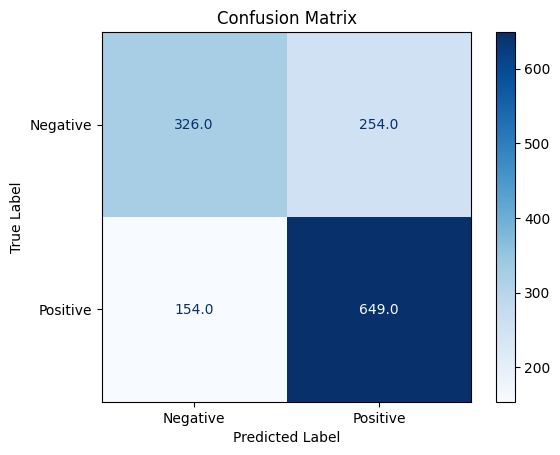

              precision    recall  f1-score   support

           0       0.68      0.56      0.62       580
           1       0.72      0.81      0.76       803

    accuracy                           0.70      1383
   macro avg       0.70      0.69      0.69      1383
weighted avg       0.70      0.70      0.70      1383



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

print("Average Confusion Matrix:")

y_pred = cnn.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)

# Print or use the results as needed
# Calculate confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm_display.plot(cmap='Blues', values_format='.1f')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

from sklearn.metrics import classification_report
# Generate classification report
report = classification_report(y_test.ravel(), y_pred.ravel())

# Print the report
print(report)

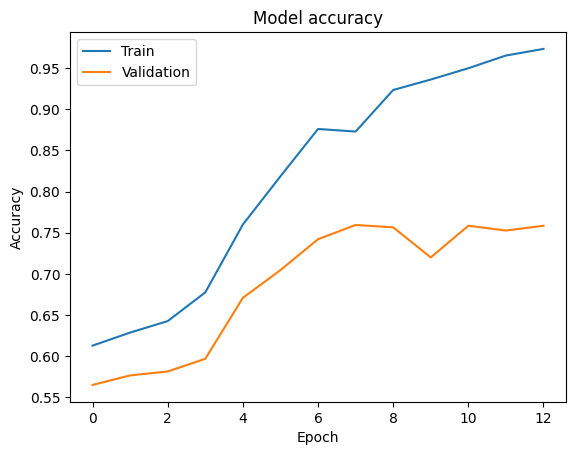

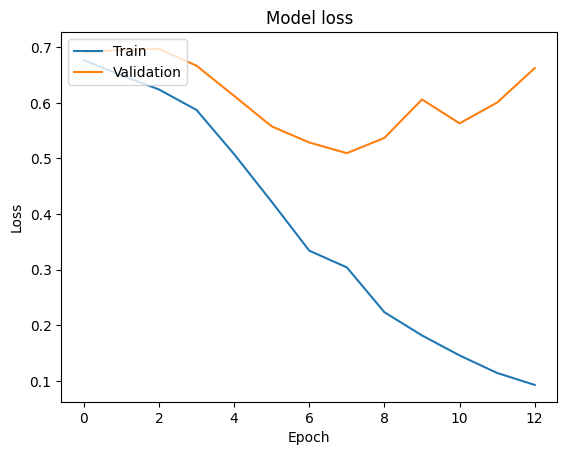

In [ ]:
# plot model accuracy and loss of training and validation

import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## LSTM

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD, Adam

lstm = Sequential()
lstm.add(LSTM(units = 100, return_sequences = True, input_shape = (1250, 33)))
lstm.add(Dropout(0.2))
lstm.add(LSTM(units = 100))
lstm.add(Dropout(0.2))
lstm.add(Dense(units = 1, activation = 'sigmoid'))
optimizer = Adam(learning_rate=0.01)
lstm.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

lstm = model.fit(X_train, y_train, epochs=30, batch_size=128, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/30
37/37 [==============================] - 8s 147ms/step - loss: 0.6672 - accuracy: 0.6028 - val_loss: 0.7117 - val_accuracy: 0.5149
Epoch 2/30
37/37 [==============================] - 4s 114ms/step - loss: 0.6355 - accuracy: 0.6320 - val_loss: 0.6852 - val_accuracy: 0.5765
Epoch 3/30
37/37 [==============================] - 4s 113ms/step - loss: 0.6265 - accuracy: 0.6428 - val_loss: 0.7086 - val_accuracy: 0.5476
Epoch 4/30
37/37 [==============================] - 4s 113ms/step - loss: 0.5835 - accuracy: 0.6842 - val_loss: 0.7265 - val_accuracy: 0.6073
Epoch 5/30
37/37 [==============================] - 4s 114ms/step - loss: 0.5665 - accuracy: 0.6794 - val_loss: 0.6775 - val_accuracy: 0.5727
Epoch 6/30
37/37 [==============================] - 4s 113ms/step - loss: 0.6270 - accuracy: 0.6552 - val_loss: 0.7719 - val_accuracy: 0.5784
Epoch 7/30
37/37 [==============================] - 4s 113ms/step - loss: 0.6153 - accuracy: 0.6605 - val_loss: 0.6813 - val_accuracy: 0.5756
Epoch 

Average Confusion Matrix:
44/44 [==============================] - 2s 42ms/step


<Figure size 800x600 with 0 Axes>

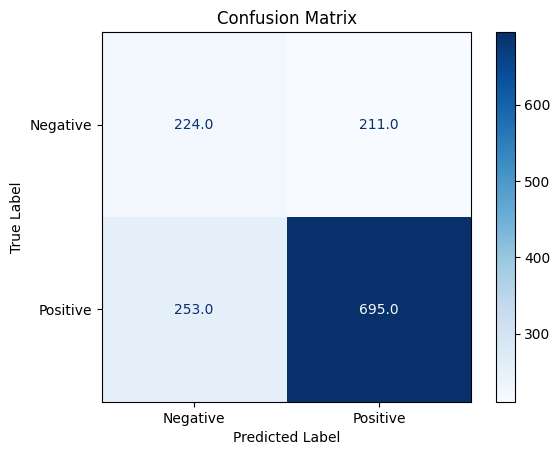

              precision    recall  f1-score   support

           0       0.47      0.51      0.49       435
           1       0.77      0.73      0.75       948

    accuracy                           0.66      1383
   macro avg       0.62      0.62      0.62      1383
weighted avg       0.67      0.66      0.67      1383



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

print("Average Confusion Matrix:")

y_pred = lstm.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)

# Print or use the results as needed
# Calculate confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm_display.plot(cmap='Blues', values_format='.1f')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

from sklearn.metrics import classification_report
# Generate classification report
report = classification_report(y_test.ravel(), y_pred.ravel())

# Print the report
print(report)

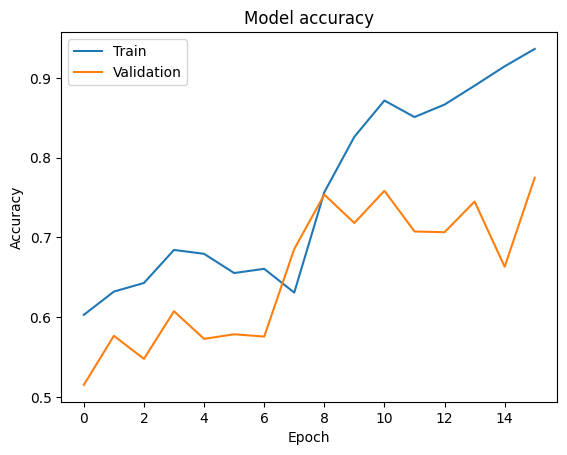

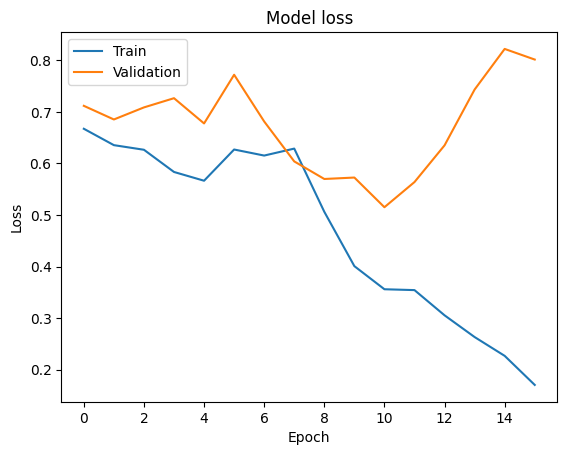

In [ ]:
# plot model accuracy and loss of training and validation

import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## CNN+LSTM

In [ ]:
from tensorflow.keras.layers import Input, Conv1D, concatenate, Dense, MaxPooling1D, Flatten, LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping

# Define the input layer with a shape of (1250, 33)
input_layer = Input(shape=(1250, 33))

# Convolutional Block
conv1 = Conv1D(32, 2, strides=2, activation='relu', padding="same")(input_layer)
conv2 = Conv1D(32, 4, strides=2, activation='relu', padding="causal")(input_layer)
conv3 = Conv1D(32, 8, strides=2, activation='relu', padding="causal")(input_layer)
cnn_output = concatenate([conv1, conv2, conv3], axis=2)

# LSTM Layer
lstm_layer = LSTM(64)(cnn_output)

# Fully Connected Layers
dense1 = Dense(32, activation='tanh')(lstm_layer)

# Output Layer
predictions = Dense(1, activation='sigmoid')(dense1)

# Create the model
model = Model(inputs=input_layer, outputs=predictions)

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


hist = model.fit(X_train, y_train, epochs=70, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stopping])


Epoch 1/70
74/74 [==============================] - 5s 41ms/step - loss: 0.6543 - accuracy: 0.6077 - val_loss: 0.6866 - val_accuracy: 0.5428
Epoch 2/70
74/74 [==============================] - 2s 28ms/step - loss: 0.5825 - accuracy: 0.6885 - val_loss: 0.6281 - val_accuracy: 0.6189
Epoch 3/70
74/74 [==============================] - 2s 29ms/step - loss: 0.5803 - accuracy: 0.7024 - val_loss: 0.6834 - val_accuracy: 0.5910
Epoch 4/70
74/74 [==============================] - 2s 28ms/step - loss: 0.4650 - accuracy: 0.7830 - val_loss: 0.5648 - val_accuracy: 0.7382
Epoch 5/70
74/74 [==============================] - 2s 27ms/step - loss: 0.5999 - accuracy: 0.6730 - val_loss: 0.6565 - val_accuracy: 0.6035
Epoch 6/70
74/74 [==============================] - 2s 27ms/step - loss: 0.4236 - accuracy: 0.8046 - val_loss: 0.6706 - val_accuracy: 0.6670
Epoch 7/70
74/74 [==============================] - 2s 28ms/step - loss: 0.4540 - accuracy: 0.7883 - val_loss: 0.6664 - val_accuracy: 0.6092
Epoch 8/70
74

Average Confusion Matrix:
44/44 [==============================] - 1s 11ms/step


<Figure size 800x600 with 0 Axes>

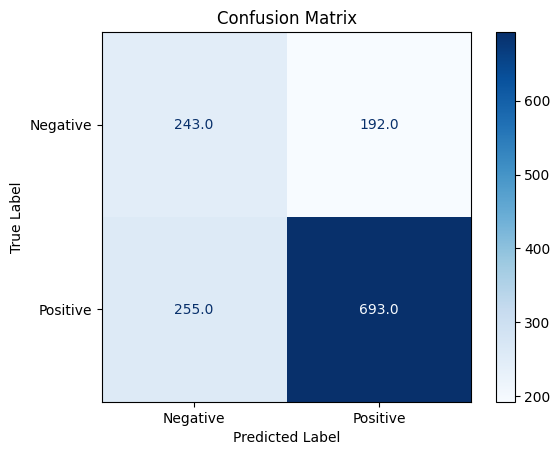

              precision    recall  f1-score   support

           0       0.49      0.56      0.52       435
           1       0.78      0.73      0.76       948

    accuracy                           0.68      1383
   macro avg       0.64      0.64      0.64      1383
weighted avg       0.69      0.68      0.68      1383



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

print("Average Confusion Matrix:")

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)

# Print or use the results as needed
# Calculate confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm_display.plot(cmap='Blues', values_format='.1f')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

from sklearn.metrics import classification_report
# Generate classification report
report = classification_report(y_test.ravel(), y_pred.ravel())

# Print the report
print(report)

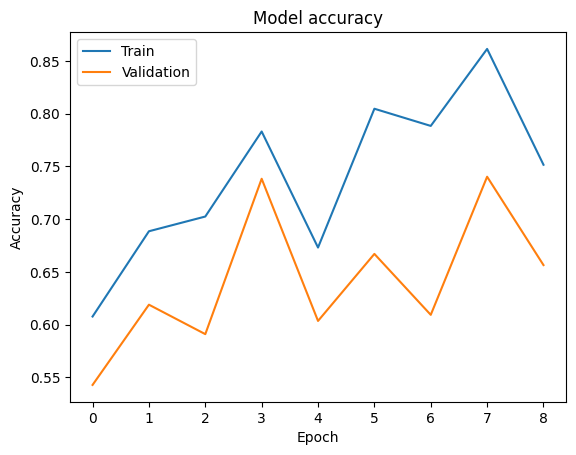

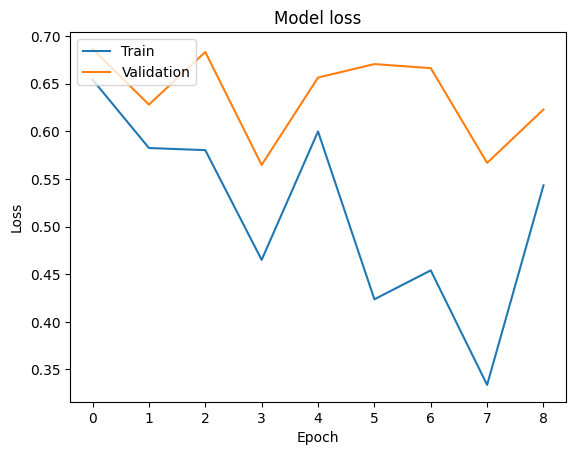

In [ ]:
# plot model accuracy and loss of training and validation

import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

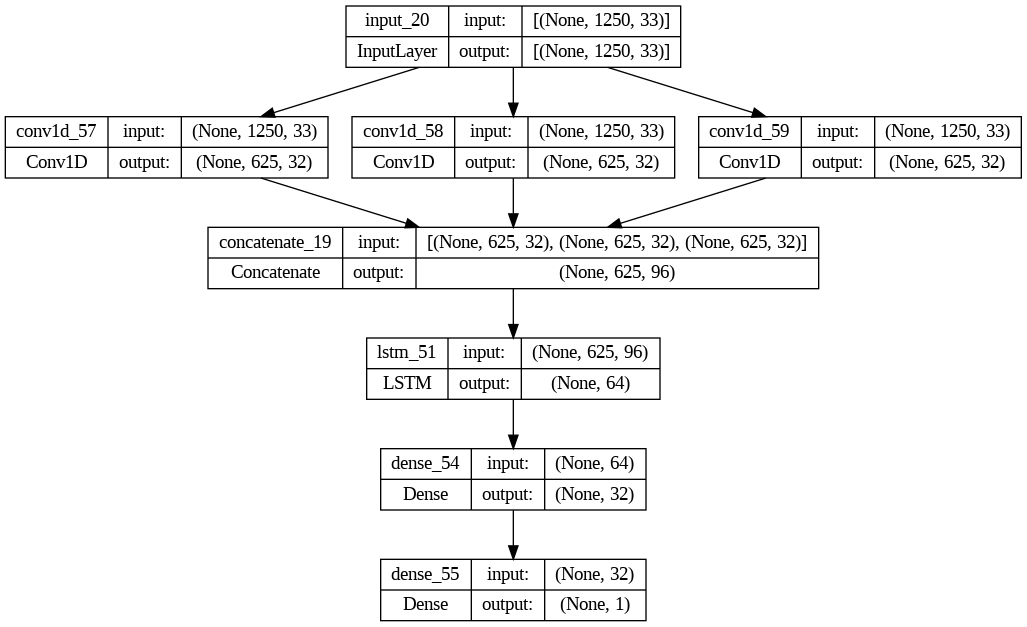

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model=hist.model, show_shapes=True)

## CNN+GRU

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input,Dense,concatenate,Flatten,GRU,Conv1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

#resource:https://github.com/dll-ncai/eeg_pre-diagnostic_screening/blob/master/code/chrononet/chrono.py

def block(input):

  """
    Create a block consisting of three parallel convolutional layers followed by concatenation.

    Parameters:
    - input: Input tensor.

    Returns:
    - Concatenated tensor resulting from the parallel convolutional layers.
    """

  conv1 = Conv1D(32, 2, strides=2,activation='relu',padding="same")(input)
  conv2 = Conv1D(32, 4, strides=2,activation='relu',padding="causal")(input)
  conv3 = Conv1D(32, 8, strides=2,activation='relu',padding="causal")(input)
  x = concatenate([conv1,conv2,conv3],axis=2)
  return x

# Define the input layer with a shape of (1250, 33)
input = Input(shape=(1250, 33))

# Create the first block
block1 = block(input)

# Create the second block using the 'block' function with the output of the first block as input
block2 = block(block1)

# Create the third block using the 'block' function with the output of the second block as input
block3 = block(block2)

gru_out1 = GRU(32,activation='tanh',return_sequences=True)(block3)
gru_out2 = GRU(32,activation='tanh',return_sequences=True)(gru_out1)
gru_out = concatenate([gru_out1,gru_out2],axis=2)
gru_out3 = GRU(32,activation='tanh',return_sequences=True)(gru_out)
gru_out = concatenate([gru_out1,gru_out2,gru_out3])
gru_out4 = GRU(32,activation='tanh')(gru_out)

# Create a Dense layer with 1 unit and sigmoid activation for binary classification
predictions = Dense(1, activation='sigmoid')(gru_out4)

# Define the model with 'input' as the input and 'predictions' as the output
cnn_gru = Model(inputs=input, outputs=predictions)

# Specify the Adam optimizer with a learning rate of 0.0001
optimizer = Adam(learning_rate=0.001)

# Compile the model with binary crossentropy loss and accuracy as the evaluation metric
cnn_gru.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

hist = cnn_gru.fit(X_train, y_train, epochs=70, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/70
74/74 [==============================] - 12s 57ms/step - loss: 0.6600 - accuracy: 0.5967 - val_loss: 0.6574 - val_accuracy: 0.5794
Epoch 2/70
74/74 [==============================] - 2s 33ms/step - loss: 0.4257 - accuracy: 0.7980 - val_loss: 0.3619 - val_accuracy: 0.8499
Epoch 3/70
74/74 [==============================] - 2s 33ms/step - loss: 0.1723 - accuracy: 0.9336 - val_loss: 0.4263 - val_accuracy: 0.8094
Epoch 4/70
74/74 [==============================] - 2s 33ms/step - loss: 0.0820 - accuracy: 0.9727 - val_loss: 0.5523 - val_accuracy: 0.8027
Epoch 5/70
74/74 [==============================] - 2s 33ms/step - loss: 0.0367 - accuracy: 0.9869 - val_loss: 0.7235 - val_accuracy: 0.7700
Epoch 6/70
74/74 [==============================] - 2s 33ms/step - loss: 0.0259 - accuracy: 0.9911 - val_loss: 0.7471 - val_accuracy: 0.8056
Epoch 7/70
74/74 [==============================] - 2s 32ms/step - loss: 0.0207 - accuracy: 0.9922 - val_loss: 0.7141 - val_accuracy: 0.8104


Average Confusion Matrix:
44/44 [==============================] - 2s 12ms/step


<Figure size 800x600 with 0 Axes>

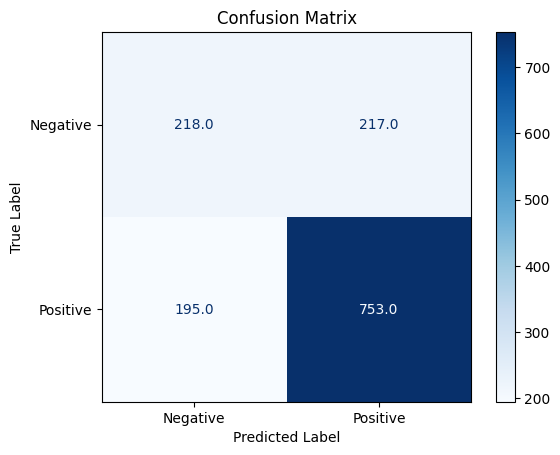

              precision    recall  f1-score   support

           0       0.53      0.50      0.51       435
           1       0.78      0.79      0.79       948

    accuracy                           0.70      1383
   macro avg       0.65      0.65      0.65      1383
weighted avg       0.70      0.70      0.70      1383



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

print("Average Confusion Matrix:")

y_pred = cnn_gru.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)

# Print or use the results as needed
# Calculate confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm_display.plot(cmap='Blues', values_format='.1f')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

from sklearn.metrics import classification_report
# Generate classification report
report = classification_report(y_test.ravel(), y_pred.ravel())

# Print the report
print(report)

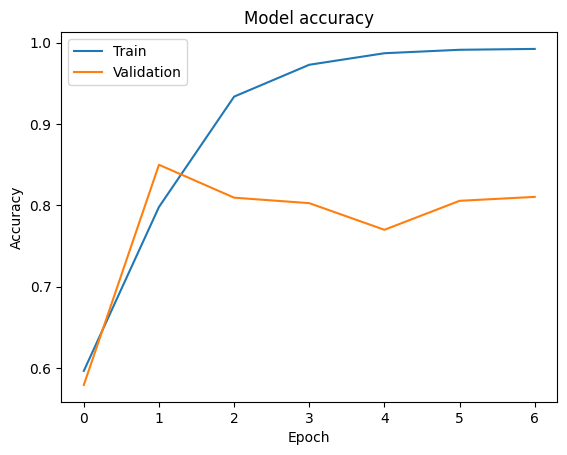

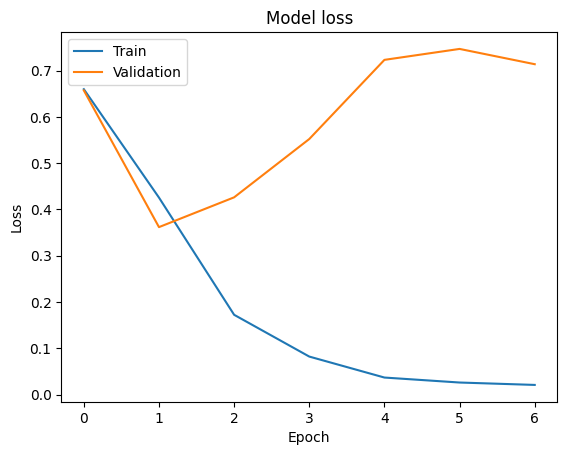

In [ ]:
# plot model accuracy and loss of training and validation

import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

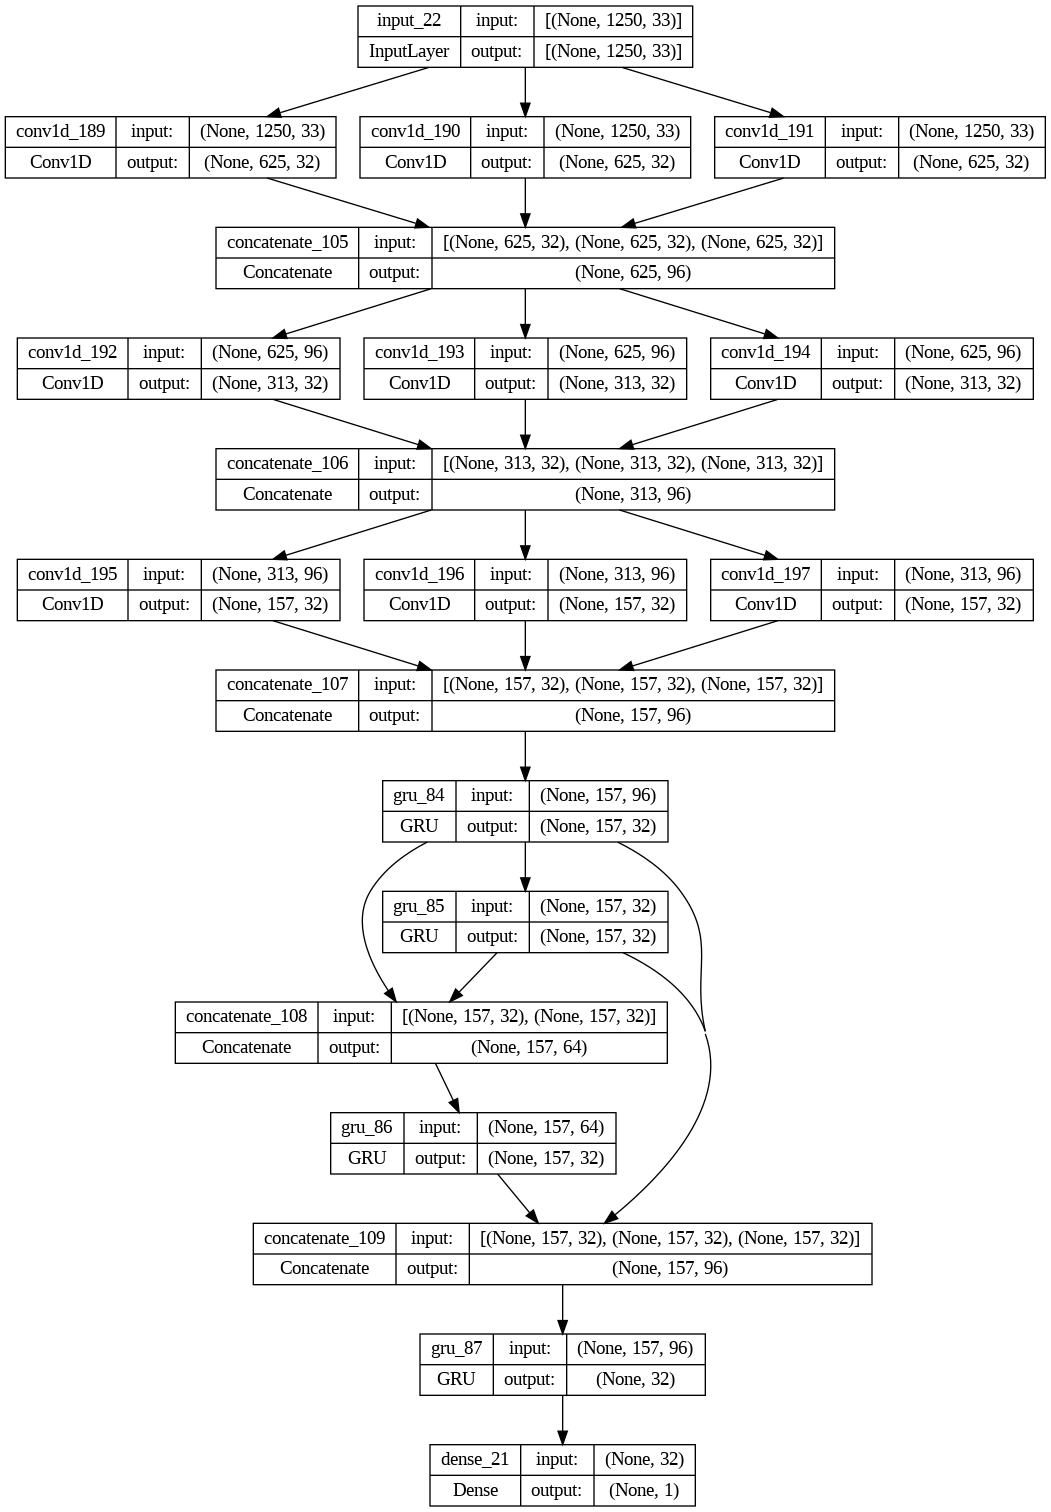

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model=hist.model, show_shapes=True)

## RNN

In [ ]:
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

input_shape = (1250, 33)  # Define input shape as a tuple

def create_model(input_shape):
    model = Sequential()
    model.add(SimpleRNN(128, input_shape=input_shape, return_sequences=True))  # RNN layer with 128 units and return sequences
    model.add(SimpleRNN(128))  # Additional RNN layer with 128 units
    model.add(Dense(64, activation='relu'))  # Dense layer with 64 units and ReLU activation
    model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation

    return model

# Pass input shape tuple to the create_model function
rnn = create_model(input_shape)

optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
rnn.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

hist = rnn.fit(X_train, y_train, epochs=70, batch_size=64, validation_data=(X_val, y_val), callbacks=[early_stopping])

Epoch 1/70
74/74 [==============================] - 120s 2s/step - loss: 0.7086 - accuracy: 0.5171 - val_loss: 0.7065 - val_accuracy: 0.5168
Epoch 2/70
74/74 [==============================] - 119s 2s/step - loss: 0.6463 - accuracy: 0.6231 - val_loss: 0.7070 - val_accuracy: 0.5168
Epoch 3/70
74/74 [==============================] - 119s 2s/step - loss: 0.6020 - accuracy: 0.6823 - val_loss: 0.7051 - val_accuracy: 0.5294
Epoch 4/70
74/74 [==============================] - 117s 2s/step - loss: 0.5574 - accuracy: 0.7242 - val_loss: 0.7049 - val_accuracy: 0.5515
Epoch 5/70
74/74 [==============================] - 120s 2s/step - loss: 0.5131 - accuracy: 0.7591 - val_loss: 0.7130 - val_accuracy: 0.5573
Epoch 6/70
74/74 [==============================] - 119s 2s/step - loss: 0.4726 - accuracy: 0.7834 - val_loss: 0.7208 - val_accuracy: 0.5573
Epoch 7/70
74/74 [==============================] - 119s 2s/step - loss: 0.4370 - accuracy: 0.8027 - val_loss: 0.7296 - val_accuracy: 0.5602


Average Confusion Matrix:
44/44 [==============================] - 8s 183ms/step


<Figure size 800x600 with 0 Axes>

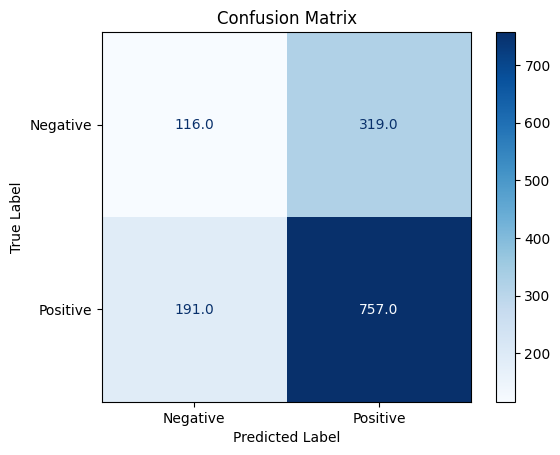

              precision    recall  f1-score   support

           0       0.38      0.27      0.31       435
           1       0.70      0.80      0.75       948

    accuracy                           0.63      1383
   macro avg       0.54      0.53      0.53      1383
weighted avg       0.60      0.63      0.61      1383



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

print("Average Confusion Matrix:")

y_pred = rnn.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)

# Print or use the results as needed
# Calculate confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])

# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm_display.plot(cmap='Blues', values_format='.1f')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

from sklearn.metrics import classification_report
# Generate classification report
report = classification_report(y_test.ravel(), y_pred.ravel())

# Print the report
print(report)

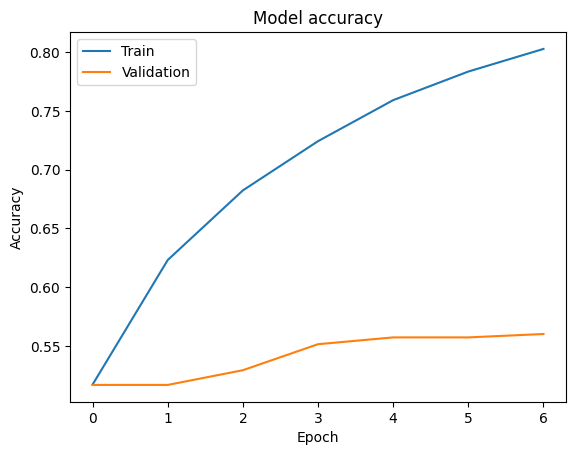

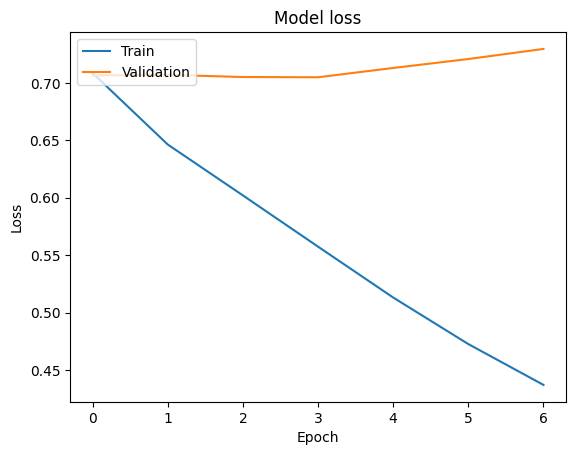

In [ ]:
# plot model accuracy and loss of training and validation

import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

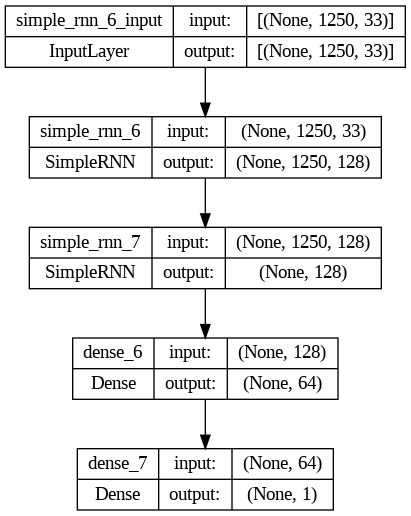

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model=hist.model, show_shapes=True)

# Ensemble

In [ ]:



print("Classification Report (Test):\n", classification_report(y_test, final_preds))

# Compute the confusion matrix for the test set
cm_test = confusion_matrix(y_test, final_preds)

# Plot the confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"fontsize": 13}) # Adjust fontsize as needed
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
# plt.title(f"Confusion Matrix for Decision Tree {model.__class__}")
plt.show()



In [ ]:
# Example evaluation for classification ( accuracy precision , recall , fi-score)
from sklearn.metrics import accuracy_score
import numpy as np
from keras.models import load_model
import joblib


ml_models = [xgboost, dt]
dl_models = [CNN, CNN_GRU, RNN]


ml_preds = [model.predict(X_test_ml).reshape(-1, 1) for model in ml_models]
dl_preds = [model.predict(X_test).reshape(-1, 1) for model in dl_models]

all_preds = np.concatenate((ml_preds, dl_preds), axis=0)


# Average the predictions
avg_preds = np.mean(all_preds)

# Make final predictions by taking the argmax (for classification) or leave as is for regression
final_preds = (avg_preds > 0.5).astype(int)  # Assuming a classification task


# Calculate evaluation metrics
accuracy = accuracy_score(y_test,final_preds)
precision = precision_score(y_test, final_preds)
recall = recall_score(y_test, final_preds)
f1 = f1_score(y_test,final_preds)


# Print the results
print("Ensemble accuracy : ", accuracy)
print("Ensemble precision : ", precision)
print("Ensemble recall : ", recall)
print("Ensemble f1 : ", f1)

Ensemble accuracy : 0.6587129428778019
Ensemble precision : 0.7207792207792207
Ensemble recall : 0.819620253164557
Ensemble f1 : 0.7670286278381045


Classification Report (Test):
               precision    recall  f1-score   support

           0       0.44      0.31      0.36       435
           1       0.72      0.82      0.77       948

    accuracy                           0.66      1383
   macro avg       0.58      0.56      0.56      1383
weighted avg       0.63      0.66      0.64      1383



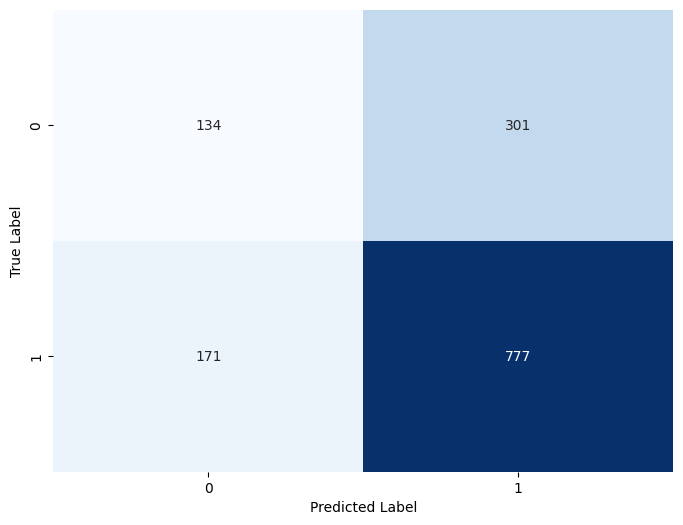

In [ ]:
# confusion matix
print("Classification Report (Test):\n", classification_report(y_test, final_preds))

# Compute the confusion matrix for the test set
cm_test = confusion_matrix(y_test, final_preds)

# Plot the confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()